<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_job_ARIMA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [18]:
data = """sym	frq	ymd	price_open	price_high	price_low	price_close	price_close_adj	volume]
SPY d	2023-01-03	384.369995117188	386.429992675781	377.829986572266	380.820007324219	373.956787109375	74850700]
SPY d	2023-01-04	383.179992675781	385.880004882813	380	383.760009765625	376.843841552734	85934100]
SPY d	2023-01-05	381.720001220703	381.839996337891	378.760009765625	379.380004882813	372.542755126953	76970500]
SPY d	2023-01-06	382.609985351563	389.25	379.410003662109	388.079986572266	381.0859375	104189600]
SPY d	2023-01-09	390.369995117188	393.700012207031	387.670013427734	387.859985351563	380.869934082031	73978100]
SPY d	2023-01-10	387.25	390.649993896484	386.269989013672	390.579986572266	383.540863037109	65358100]
SPY d	2023-01-11	392.230010986328	395.600006103516	391.380004882813	395.519989013672	388.391845703125	68881100]
SPY d	2023-01-12	396.670013427734	398.489990234375	392.420013427734	396.959991455078	389.805938720703	90157700]
SPY d	2023-01-13	393.619995117188	399.100006103516	393.339996337891	398.5	391.318176269531	63903900]
SPY d	2023-01-17	398.480010986328	400.230010986328	397.059997558594	397.769989013672	390.601318359375	62677300]
SPY d	2023-01-18	399.010009765625	400.119995117188	391.279998779297	391.489990234375	384.434478759766	99632300]
SPY d	2023-01-19	389.359985351563	391.079986572266	387.260009765625	388.640014648438	381.635894775391	86958900]
SPY d	2023-01-20	390.100006103516	396.040008544922	388.380004882813	395.880004882813	388.745391845703	91806400]
SPY d	2023-01-23	396.720001220703	402.649993896484	395.720001220703	400.630004882813	393.409790039063	84178800]
SPY d	2023-01-24	398.880004882813	401.149993896484	397.640014648438	400.200012207031	392.987548828125	59524900]
SPY d	2023-01-25	395.950012207031	400.700012207031	393.559997558594	400.350006103516	393.134826660156	84800300]
SPY d	2023-01-26	403.130004882813	404.920013427734	400.029998779297	404.75	397.455535888672	72287400]
SPY d	2023-01-27	403.660003662109	408.160003662109	403.440002441406	405.679992675781	398.368774414063	68346200]
SPY d	2023-01-30	402.799987792969	405.130004882813	400.279998779297	400.589996337891	393.370544433594	74202000]
SPY d	2023-01-31	401.130004882813	406.529998779297	400.769989013672	406.480010986328	399.154388427734	86811800]
SPY d	2023-02-01	405.209991455078	413.670013427734	402.350006103516	410.799987792969	403.396484375	101459200]
SPY d	2023-02-02	414.859985351563	418.309997558594	412.880004882813	416.779998779297	409.268707275391	101654500]
SPY d	2023-02-03	411.589996337891	416.970001220703	411.089996337891	412.350006103516	404.918579101563	94736800]
SPY d	2023-02-06	409.790008544922	411.290008544922	408.100006103516	409.829986572266	402.444000244141	60295300]
SPY d	2023-02-07	408.869995117188	416.489990234375	407.570007324219	415.190002441406	407.707397460938	90990700]
SPY d	2023-02-08	413.130004882813	414.529998779297	409.929992675781	410.649993896484	403.249237060547	76227500]
SPY d	2023-02-09	414.410003662109	414.570007324219	405.809997558594	407.089996337891	399.753326416016	78694900]
SPY d	2023-02-10	405.859985351563	408.440002441406	405.010009765625	408.040008544922	400.686248779297	70769700]
SPY d	2023-02-13	408.720001220703	412.970001220703	408.239990234375	412.829986572266	405.389892578125	64913500]
SPY d	2023-02-14	411.239990234375	415.049987792969	408.510009765625	412.640014648438	405.203369140625	88389300]
SPY d	2023-02-15	410.350006103516	414.059997558594	409.470001220703	413.980010986328	406.519195556641	61555700]
SPY d	2023-02-16	408.790008544922	412.910003662109	408.140014648438	408.279998779297	400.921905517578	76431500]
SPY d	2023-02-17	406.059997558594	407.510009765625	404.049987792969	407.260009765625	399.920318603516	89257800]
SPY d	2023-02-21	403.059997558594	404.160003662109	398.820007324219	399.089996337891	391.897521972656	82655900]
SPY d	2023-02-22	399.519989013672	401.130004882813	397.019989013672	398.540008544922	391.357452392578	83742300]
SPY d	2023-02-23	401.559997558594	402.200012207031	396.25	400.660003662109	393.439300537109	96242400]
SPY d	2023-02-24	395.420013427734	397.25	393.640014648438	396.380004882813	389.236358642578	108194400]
SPY d	2023-02-27	399.869995117188	401.290008544922	396.75	397.730010986328	390.562072753906	80444700]
SPY d	2023-02-28	397.230010986328	399.279998779297	396.149993896484	396.260009765625	389.118530273438	96438600]
SPY d	2023-03-01	395.410003662109	396.690002441406	393.380004882813	394.739990234375	387.625915527344	99706800]
SPY d	2023-03-02	392.679992675781	398.690002441406	392.329986572266	397.809997558594	390.640594482422	85127800]
SPY d	2023-03-03	399.709991455078	404.450012207031	399.029998779297	404.190002441406	396.905639648438	90120000]
SPY d	2023-03-06	405.049987792969	407.450012207031	404.010009765625	404.470001220703	397.180572509766	72795900]
SPY d	2023-03-07	404.420013427734	404.670013427734	397.630004882813	398.269989013672	391.092315673828	108310600]
SPY d	2023-03-08	398.390014648438	399.709991455078	396.589996337891	398.920013427734	391.730621337891	74746600]
SPY d	2023-03-09	399.739990234375	401.480010986328	390.529998779297	391.559997558594	384.503234863281	111945300]
SPY d	2023-03-10	390.989990234375	393.160003662109	384.320007324219	385.910003662109	378.955078125	189253000]
SPY d	2023-03-13	381.809997558594	390.390014648438	380.649993896484	385.359985351563	378.414947509766	157790000]
SPY d	2023-03-14	390.5	393.450012207031	387.049987792969	391.730010986328	384.670196533203	149752400]
SPY d	2023-03-15	385.890014648438	389.489990234375	383.709991455078	389.279998779297	382.264373779297	172996900]
SPY d	2023-03-16	386.820007324219	396.470001220703	386.290008544922	396.109985351563	388.971221923828	143254200]
SPY d	2023-03-17	393.220001220703	394.399993896484	388.549987792969	389.989990234375	384.423126220703	140553400]
SPY d	2023-03-20	390.799987792969	394.170013427734	390.070007324219	393.739990234375	388.119567871094	93055800]
SPY d	2023-03-21	397.239990234375	399.410003662109	395.579986572266	398.910003662109	393.215789794922	91524200]
SPY d	2023-03-22	398.730010986328	402.489990234375	392.070007324219	392.109985351563	386.512817382813	111746600]
SPY d	2023-03-23	395.089996337891	399.290008544922	390.350006103516	393.170013427734	387.557739257813	119351300]
SPY d	2023-03-24	391.839996337891	395.839996337891	389.399993896484	395.75	390.100891113281	107682400]
SPY d	2023-03-27	398.119995117188	398.920013427734	395.559997558594	396.489990234375	390.830322265625	74010400]
SPY d	2023-03-28	395.769989013672	396.489990234375	393.690002441406	395.600006103516	389.953033447266	62871700]
SPY d	2023-03-29	399.929992675781	401.600006103516	398.679992675781	401.350006103516	395.621002197266	77497900]
SPY d	2023-03-30	404.089996337891	404.350006103516	401.760009765625	403.700012207031	397.937438964844	69840000]
SPY d	2023-03-31	404.660003662109	409.700012207031	404.549987792969	409.390014648438	403.546203613281	112062600]
SPY d	2023-04-03	408.850006103516	411.369995117188	408.440002441406	410.950012207031	405.083923339844	67391100]
SPY d	2023-04-04	411.619995117188	411.920013427734	407.239990234375	408.670013427734	402.836517333984	66601500]
SPY d	2023-04-05	407.910003662109	408.700012207031	405.880004882813	407.600006103516	401.78173828125	65200200]
SPY d	2023-04-06	406.769989013672	409.480010986328	405.679992675781	409.190002441406	403.349029541016	63743300]
SPY d	2023-04-10	406.609985351563	409.690002441406	405.970001220703	409.609985351563	403.763031005859	63681000]
SPY d	2023-04-11	410.260009765625	411.179992675781	408.920013427734	409.720001220703	403.871490478516	59297900]
SPY d	2023-04-12	411.869995117188	412.170013427734	407.440002441406	408.049987792969	402.225311279297	86420400]
SPY d	2023-04-13	409.179992675781	413.839996337891	407.989990234375	413.470001220703	407.567962646484	85814800]
SPY d	2023-04-14	412.809997558594	415.089996337891	410.059997558594	412.459991455078	406.572357177734	78161500]
SPY d	2023-04-17	412.369995117188	413.959991455078	411.089996337891	413.940002441406	408.03125	66436400]
SPY d	2023-04-18	415.579986572266	415.720001220703	412.779998779297	414.209991455078	408.29736328125	63560000]
SPY d	2023-04-19	412.220001220703	415.079986572266	412.160003662109	414.140014648438	408.228363037109	55227300]
SPY d	2023-04-20	411.209991455078	413.700012207031	410.269989013672	411.880004882813	406.000671386719	75840400]
SPY d	2023-04-21	412.190002441406	412.679992675781	410.170013427734	412.200012207031	406.316070556641	73457400]
SPY d	2023-04-24	411.989990234375	413.070007324219	410.600006103516	412.630004882813	406.739990234375	64332100]
SPY d	2023-04-25	410.579986572266	411.160003662109	406.019989013672	406.079986572266	400.283447265625	97766700]
SPY d	2023-04-26	406.720001220703	407.839996337891	403.779998779297	404.359985351563	398.587951660156	80447000]
SPY d	2023-04-27	407	412.690002441406	406.739990234375	412.410003662109	406.523101806641	92968400]
SPY d	2023-04-28	411.489990234375	415.940002441406	411.429992675781	415.929992675781	409.992828369141	89335600]
SPY d	2023-05-01	415.470001220703	417.619995117188	415.269989013672	415.510009765625	409.578826904297	62122300]
SPY d	2023-05-02	414.769989013672	414.820007324219	407.820007324219	410.839996337891	404.975463867188	103998500]
SPY d	2023-05-03	411.359985351563	413.869995117188	407.769989013672	408.019989013672	402.195770263672	91531800]
SPY d	2023-05-04	406.929992675781	407.269989013672	403.739990234375	405.130004882813	399.346984863281	94901900]
SPY d	2023-05-05	408.910003662109	413.720001220703	408.640014648438	412.630004882813	406.739990234375	87844000]
SPY d	2023-05-08	412.970001220703	413.239990234375	411.279998779297	412.739990234375	406.848358154297	50046800]
SPY d	2023-05-09	411.130004882813	412.089996337891	410.690002441406	410.929992675781	405.064208984375	49220100]
SPY d	2023-05-10	413.880004882813	414.540008544922	408.869995117188	412.850006103516	406.956817626953	96142900]
SPY d	2023-05-11	411.950012207031	412.429992675781	409.970001220703	412.130004882813	406.247100830078	70157100]
SPY d	2023-05-12	413.420013427734	413.640014648438	409.070007324219	411.589996337891	405.714782714844	70439400]
SPY d	2023-05-15	412.220001220703	413.429992675781	410.230010986328	413.010009765625	407.114501953125	54289400]
SPY d	2023-05-16	411.859985351563	412.820007324219	410.239990234375	410.25	404.393920898438	57705500]
SPY d	2023-05-17	412.350006103516	415.859985351563	410.640014648438	415.230010986328	409.302856445313	87287000
SPY d	2023-05-18	414.899993896484	419.670013427734	414.670013427734	419.230010986328	413.245758056641	97177200
SPY d	2023-05-19	420.170013427734	420.720001220703	417.350006103516	418.619995117188	412.644439697266	103679700
SPY d	2023-05-22	418.640014648438	420.390014648438	417.350006103516	418.790008544922	412.81201171875	60745400
SPY d	2023-05-23	417.079986572266	418.720001220703	413.679992675781	414.089996337891	408.179077148438	86383500
SPY d	2023-05-24	412.420013427734	412.820007324219	409.880004882813	411.089996337891	405.221923828125	89213700
SPY d	2023-05-25	414.739990234375	416.160003662109	412.410003662109	414.649993896484	408.731109619141	90961600
SPY d	2023-05-26	415.329986572266	420.769989013672	415.25	420.019989013672	414.024475097656	93830000
SPY d	2023-05-30	422.029998779297	422.579986572266	418.739990234375	420.179992675781	414.182159423828	72216000
SPY d	2023-05-31	418.279998779297	419.220001220703	416.220001220703	417.850006103516	411.885437011719	110811800
SPY d	2023-06-01	418.089996337891	422.920013427734	416.790008544922	421.820007324219	415.798767089844	88865000
SPY d	2023-06-02	424.5	428.739990234375	423.950012207031	427.920013427734	421.811706542969	91366700
SPY d	2023-06-05	428.279998779297	429.619995117188	426.369995117188	427.100006103516	421.003387451172	65460200
SPY d	2023-06-06	426.670013427734	428.579986572266	425.989990234375	428.029998779297	421.920135498047	64022200
SPY d	2023-06-07	428.440002441406	429.619995117188	426.109985351563	426.549987792969	420.461212158203	85373300
SPY d	2023-06-08	426.619995117188	429.600006103516	425.820007324219	429.130004882813	423.004425048828	61952800
SPY d	2023-06-09	429.959991455078	431.989990234375	428.869995117188	429.899993896484	423.763458251953	85742800
SPY d	2023-06-12	430.920013427734	433.880004882813	430.170013427734	433.799987792969	427.607757568359	76104300
SPY d	2023-06-13	435.320007324219	437.329986572266	434.630004882813	436.660003662109	430.426940917969	95899700
SPY d	2023-06-14	437.010009765625	439.059997558594	433.589996337891	437.179992675781	430.939483642578	100612100
SPY d	2023-06-15	436.329986572266	443.899993896484	436.230010986328	442.600006103516	436.282135009766	110303100
SPY d	2023-06-16	443.019989013672	443.609985351563	438.970001220703	439.459991455078	434.796081542969	114121300
SPY d	2023-06-20	437.450012207031	438.369995117188	435.029998779297	437.179992675781	432.540252685547	76160400
SPY d	2023-06-21	436.160003662109	436.989990234375	434.329986572266	434.940002441406	430.324035644531	76982300
SPY d	2023-06-22	433.950012207031	436.619995117188	433.600006103516	436.510009765625	431.877410888672	70637200
SPY d	2023-06-23	432.929992675781	435.059997558594	432.470001220703	433.209991455078	428.612396240234	92074500
SPY d	2023-06-26	432.619995117188	434.609985351563	431.190002441406	431.440002441406	426.861206054688	72823600
SPY d	2023-06-27	432.350006103516	436.809997558594	431.880004882813	436.170013427734	431.540985107422	72813700
SPY d	2023-06-28	435.049987792969	437.440002441406	434.410003662109	436.390014648438	431.758666992188	75636000
SPY d	2023-06-29	435.959991455078	438.279998779297	435.540008544922	438.109985351563	433.460418701172	67882300
SPY d	2023-06-30	441.440002441406	444.299987792969	441.109985351563	443.279998779297	438.575561523438	104921500
SPY d	2023-07-03	442.920013427734	444.079986572266	442.630004882813	443.790008544922	439.080108642578	32793400
SPY d	2023-07-05	441.910003662109	443.890014648438	441.899993896484	443.130004882813	438.427124023438	58418400
SPY d	2023-07-06	439.420013427734	440.100006103516	437.059997558594	439.660003662109	434.993957519531	80658300
SPY d	2023-07-07	438.630004882813	442.640014648438	438.299987792969	438.549987792969	433.895751953125	86076100
SPY d	2023-07-10	438.179992675781	439.839996337891	437.589996337891	439.660003662109	434.993957519531	62443500
SPY d	2023-07-11	440.450012207031	442.970001220703	439.440002441406	442.459991455078	437.764221191406	64463800
SPY d	2023-07-12	446.390014648438	447.480010986328	444.910003662109	446.019989013672	441.286437988281	91924500
SPY d	2023-07-13	447.899993896484	450.380004882813	447.450012207031	449.559997558594	444.788879394531	72425200
SPY d	2023-07-14	450.480010986328	451.359985351563	448.489990234375	449.279998779297	444.511871337891	69761800
SPY d	2023-07-17	449.130004882813	451.929992675781	449.079986572266	450.839996337891	446.055297851563	52680200
SPY d	2023-07-18	450.5	454.859985351563	450.049987792969	454.190002441406	449.369720458984	80744400
SPY d	2023-07-19	455.010009765625	456.429992675781	454.109985351563	455.200012207031	450.369049072266	65891700
SPY d	2023-07-20	454.170013427734	455.100006103516	451.440002441406	452.179992675781	447.381072998047	70591600
SPY d	2023-07-21	453.959991455078	454.170013427734	452.170013427734	452.179992675781	447.381072998047	71245400
SPY d	2023-07-24	453.369995117188	455.040008544922	452.299987792969	454.200012207031	449.379638671875	54023400
SPY d	2023-07-25	453.920013427734	456.739990234375	453.869995117188	455.440002441406	450.606506347656	55191200
SPY d	2023-07-26	454.470001220703	456.989990234375	453.380004882813	455.510009765625	450.675750732422	71052900
SPY d	2023-07-27	459.019989013672	459.440002441406	451.549987792969	452.489990234375	447.687774658203	92194400
SPY d	2023-07-28	455.880004882813	457.779998779297	452.489990234375	456.920013427734	452.070770263672	80011800
SPY d	2023-07-31	457.410003662109	458.160003662109	456.049987792969	457.790008544922	452.931549072266	62040400
SPY d	2023-08-01	456.269989013672	457.25	455.489990234375	456.480010986328	451.635437011719	55291500
SPY d	2023-08-02	453.25	453.519989013672	449.350006103516	450.130004882813	445.352844238281	93933400
SPY d	2023-08-03	448.040008544922	450.790008544922	447.369995117188	448.839996337891	444.076507568359	64276100
SPY d	2023-08-04	450.720001220703	452.899993896484	446.269989013672	446.809997558594	442.068084716797	100052300
SPY d	2023-08-07	448.709991455078	450.869995117188	447.989990234375	450.709991455078	445.926696777344	58357500
SPY d	2023-08-08	448.079986572266	450.700012207031	445.269989013672	448.75	443.987487792969	71361300
SPY d	2023-08-09	449.029998779297	449.200012207031	444.959991455078	445.75	441.019317626953	78789600
SPY d	2023-08-10	448.190002441406	451.700012207031	444.700012207031	445.910003662109	441.177642822266	93005500
SPY d	2023-08-11	443.970001220703	446.700012207031	443.350006103516	445.649993896484	440.920379638672	68664600
SPY d	2023-08-14	444.700012207031	448.109985351563	444.380004882813	448.109985351563	443.354248046875	47867400
SPY d	2023-08-15	446.269989013672	446.640014648438	442.299987792969	442.890014648438	438.189666748047	75707500
SPY d	2023-08-16	442.459991455078	444.179992675781	439.529998779297	439.640014648438	434.974182128906	80107200
SPY d	2023-08-17	441.160003662109	441.429992675781	435.75	436.290008544922	431.659729003906	95711300
SPY d	2023-08-18	433.369995117188	437.570007324219	433.010009765625	436.5	431.867492675781	98758400
SPY d	2023-08-21	437.549987792969	440.109985351563	435.320007324219	439.339996337891	434.677337646484	68719000
SPY d	2023-08-22	441.179992675781	441.179992675781	437.570007324219	438.149993896484	433.499938964844	65062900
SPY d	2023-08-23	439.25	443.670013427734	439.100006103516	443.029998779297	438.328186035156	68441000
SPY d	2023-08-24	444.690002441406	445.220001220703	436.859985351563	436.890014648438	432.253326416016	88517300
SPY d	2023-08-25	438.679992675781	441.299987792969	435	439.970001220703	435.300659179688	102325100
SPY d	2023-08-28	442.239990234375	443.399993896484	439.970001220703	442.760009765625	438.061065673828	61595400
SPY d	2023-08-29	442.649993896484	449.450012207031	442.459991455078	449.160003662109	444.393127441406	83081900
SPY d	2023-08-30	449.510009765625	451.670013427734	448.779998779297	451.010009765625	446.223510742188	69053900
SPY d	2023-08-31	451.649993896484	452.829986572266	450.160003662109	450.350006103516	445.570495605469	66084600
SPY d	2023-09-01	453.170013427734	453.670013427734	449.679992675781	451.190002441406	446.401580810547	58875700
SPY d	2023-09-05	450.730010986328	451.059997558594	449.170013427734	449.239990234375	444.472259521484	55166200
SPY d	2023-09-06	448.399993896484	448.510009765625	443.809997558594	446.220001220703	441.484313964844	70758500
SPY d	2023-09-07	443.109985351563	445.549987792969	442.75	444.850006103516	440.128845214844	70355400
SPY d	2023-09-08	444.899993896484	447.109985351563	444.529998779297	445.519989013672	440.791748046875	61659700
SPY d	2023-09-11	448.239990234375	448.769989013672	446.470001220703	448.450012207031	443.690673828125	60180100
SPY d	2023-09-12	446.950012207031	448.529998779297	445.390014648438	445.989990234375	441.256774902344	67565400
SPY d	2023-09-13	446.220001220703	447.709991455078	445.079986572266	446.510009765625	441.771270751953	60199300
SPY d	2023-09-14	449.070007324219	451.079986572266	447.720001220703	450.359985351563	445.580383300781	83430800
SPY d	2023-09-15	447.140014648438	447.480010986328	442.920013427734	443.369995117188	440.2119140625	111761400
SPY d	2023-09-18	443.049987792969	444.970001220703	442.559997558594	443.630004882813	440.470031738281	55752200
SPY d	2023-09-19	442.679992675781	443.290008544922	439.940002441406	442.709991455078	439.556610107422	66514600
SPY d	2023-09-20	444.010009765625	444.440002441406	438.429992675781	438.640014648438	435.515625	82562600
SPY d	2023-09-21	435.700012207031	435.970001220703	431.230010986328	431.390014648438	428.317260742188	103976100
SPY d	2023-09-22	432.450012207031	434.100006103516	429.989990234375	430.420013427734	427.354156494141	100829700
SPY d	2023-09-25	429.170013427734	432.269989013672	428.720001220703	432.230010986328	429.151245117188	70874500
SPY d	2023-09-26	429.089996337891	429.820007324219	425.019989013672	425.880004882813	422.846496582031	96168400
SPY d	2023-09-27	427.089996337891	427.670013427734	422.290008544922	426.049987792969	423.015258789063	104705800
SPY d	2023-09-28	425.480010986328	430.25	424.869995117188	428.519989013672	425.467681884766	92258300
SPY d	2023-09-29	431.670013427734	431.850006103516	425.910003662109	427.480010986328	424.435089111328	115078500
SPY d	2023-10-02	426.619995117188	428.600006103516	424.459991455078	427.309997558594	424.266296386719	83798600
SPY d	2023-10-03	425.059997558594	427.369995117188	420.179992675781	421.589996337891	418.587036132813	103760600
SPY d	2023-10-04	422.070007324219	425.429992675781	420.559997558594	424.660003662109	421.635192871094	87453000
SPY d	2023-10-05	424.359985351563	425.369995117188	421.170013427734	424.5	421.476318359375	70142700
SPY d	2023-10-06	421.970001220703	431.130004882813	420.600006103516	429.540008544922	426.480407714844	113202700
SPY d	2023-10-09	427.579986572266	432.880004882813	427.010009765625	432.290008544922	429.210815429688	80374400
SPY d	2023-10-10	432.940002441406	437.220001220703	432.529998779297	434.540008544922	431.444793701172	78607300
SPY d	2023-10-11	435.640014648438	436.579986572266	433.179992675781	436.320007324219	433.212127685547	62451700
SPY d	2023-10-12	436.950012207031	437.339996337891	431.230010986328	433.660003662109	430.571075439453	81154200
SPY d	2023-10-13	435.209991455078	436.450012207031	429.880004882813	431.5	428.426422119141	95143100
SPY d	2023-10-16	433.820007324219	437.140014648438	433.570007324219	436.040008544922	432.934143066406	75433200
SPY d	2023-10-17	432.809997558594	438.140014648438	432.450012207031	436.019989013672	432.914245605469	75324700
SPY d	2023-10-18	434.190002441406	435.179992675781	429.089996337891	430.209991455078	427.145629882813	93559800
SPY d	2023-10-19	430.950012207031	432.820007324219	425.730010986328	426.429992675781	423.392547607422	121323000
SPY d	2023-10-20	425.980010986328	426.540008544922	421.079986572266	421.190002441406	418.189880371094	123845800
SPY d	2023-10-23	419.609985351563	424.450012207031	417.799987792969	420.459991455078	417.465087890625	92035100
SPY d	2023-10-24	422.649993896484	424.820007324219	420.739990234375	423.630004882813	420.612518310547	78564200
SPY d	2023-10-25	421.890014648438	421.920013427734	417.019989013672	417.549987792969	414.575805664063	94223200
SPY d	2023-10-26	416.450012207031	417.329986572266	411.600006103516	412.549987792969	409.611419677734	115156800
SPY d	2023-10-27	414.190002441406	414.600006103516	409.209991455078	410.679992675781	407.754760742188	107367700
SPY d	2023-10-30	413.559997558594	416.679992675781	412.220001220703	415.589996337891	412.629760742188	86562700
SPY d	2023-10-31	416.179992675781	418.529998779297	414.209991455078	418.200012207031	415.22119140625	79665200
SPY d	2023-11-01	419.200012207031	423.5	418.649993896484	422.660003662109	419.649444580078	98068100
SPY d	2023-11-02	426.579986572266	430.920013427734	426.559997558594	430.760009765625	427.691741943359	94938900
SPY d	2023-11-03	433.140014648438	436.290008544922	433.010009765625	434.690002441406	431.59375	100110800
SPY d	2023-11-06	435.470001220703	436.149993896484	433.679992675781	435.690002441406	432.586608886719	67831700
SPY d	2023-11-07	435.690002441406	437.589996337891	434.510009765625	436.929992675781	433.817749023438	64256100
SPY d	2023-11-08	437.549987792969	438.089996337891	434.869995117188	437.25	434.135498046875	61746000
SPY d	2023-11-09	438.429992675781	438.470001220703	433.399993896484	433.839996337891	430.749786376953	83174400
SPY d	2023-11-10	435.980010986328	440.929992675781	433.829986572266	440.609985351563	437.471557617188	89462200
SPY d	2023-11-13	439.230010986328	441.329986572266	438.420013427734	440.190002441406	437.054534912109	52236100
SPY d	2023-11-14	446.320007324219	450.059997558594	446.089996337891	448.730010986328	445.533752441406	97176900
SPY d	2023-11-15	450.109985351563	451.380004882813	448.799987792969	449.679992675781	446.476928710938	77327600
SPY d	2023-11-16	449.220001220703	450.559997558594	448.119995117188	450.230010986328	447.023040771484	66665800
SPY d	2023-11-17	450.239990234375	451.420013427734	449.290008544922	450.790008544922	447.579071044922	83133200
SPY d	2023-11-20	450.529998779297	455.130004882813	450.519989013672	454.260009765625	451.024322509766	69936200
SPY d	2023-11-21	453.179992675781	454.130004882813	451.959991455078	453.269989013672	450.041381835938	49244600
SPY d	2023-11-22	454.980010986328	456.380004882813	453.890014648438	455.019989013672	451.778900146484	59394900
SPY d	2023-11-24	455.070007324219	455.5	454.730010986328	455.299987792969	452.056915283203	29737400
SPY d	2023-11-27	454.649993896484	455.489990234375	454.079986572266	454.480010986328	451.242767333984	50506000
SPY d	2023-11-28	454.079986572266	456.269989013672	453.5	454.929992675781	451.689544677734	62115000
SPY d	2023-11-29	457.149993896484	458.320007324219	454.200012207031	454.609985351563	451.371826171875	63146000
SPY d	2023-11-30	455.480010986328	456.760009765625	453.339996337891	456.399993896484	453.149078369141	79752700
SPY d	2023-12-01	455.769989013672	459.649993896484	455.160003662109	459.100006103516	455.829864501953	89097900
SPY d	2023-12-04	455.600006103516	459.119995117188	454.339996337891	456.690002441406	453.437042236328	72430900
SPY d	2023-12-05	455.260009765625	457.589996337891	454.869995117188	456.600006103516	453.347686767578	69793500
SPY d	2023-12-06	458.809997558594	458.839996337891	454.309997558594	454.760009765625	451.520782470703	69124700
SPY d	2023-12-07	456.910003662109	458.899993896484	456.290008544922	458.230010986328	454.966064453125	66995400
SPY d	2023-12-08	457.459991455078	460.75	457.209991455078	460.200012207031	456.922027587891	83080900
SPY d	2023-12-11	459.690002441406	462.170013427734	459.470001220703	461.989990234375	458.699279785156	65002200
SPY d	2023-12-12	461.630004882813	464.200012207031	460.600006103516	464.100006103516	460.794250488281	68327600
SPY d	2023-12-13	464.489990234375	470.760009765625	464.119995117188	470.5	467.148651123047	93278000
SPY d	2023-12-14	472.5	473.730010986328	469.25	472.010009765625	468.647918701172	119026000
SPY d	2023-12-15	469.489990234375	470.700012207031	467.429992675781	469.329986572266	467.876281738281	141319300
SPY d	2023-12-18	470.980010986328	472.980010986328	469.890014648438	471.970001220703	470.508117675781	70375300
SPY d	2023-12-19	472.529998779297	474.920013427734	472.450012207031	474.839996337891	473.369232177734	55761800
SPY d	2023-12-20	473.959991455078	475.899993896484	467.820007324219	468.260009765625	466.809600830078	102921000
SPY d	2023-12-21	471.329986572266	472.980010986328	468.839996337891	472.700012207031	471.235870361328	86667500
SPY d	2023-12-22	473.859985351563	475.380004882813	471.700012207031	473.649993896484	472.182891845703	67126600
SPY d	2023-12-26	474.070007324219	476.579986572266	473.989990234375	475.649993896484	474.176696777344	55387000
SPY d	2023-12-27	475.440002441406	476.660003662109	474.890014648438	476.510009765625	475.034057617188	68000300
SPY d	2023-12-28	476.880004882813	477.549987792969	476.260009765625	476.690002441406	475.213500976563	77158100
SPY d	2023-12-29	476.489990234375	477.029998779297	473.299987792969	475.309997558594	473.837768554688	122234100
SPY d	2024-01-02	472.160003662109	473.670013427734	470.489990234375	472.649993896484	471.186004638672	123623700
SPY d	2024-01-03	470.429992675781	471.190002441406	468.170013427734	468.790008544922	467.337982177734	103585900
SPY d	2024-01-04	468.299987792969	470.959991455078	467.049987792969	467.279998779297	465.832641601563	84232200
SPY d	2024-01-05	467.489990234375	470.440002441406	466.429992675781	467.920013427734	466.470672607422	86060800
SPY d	2024-01-08	468.429992675781	474.75	468.299987792969	474.600006103516	473.129974365234	74879100
SPY d	2024-01-09	471.869995117188	474.929992675781	471.350006103516	473.880004882813	472.412200927734	65931400
SPY d	2024-01-10	474.160003662109	477.450012207031	473.869995117188	476.559997558594	475.083892822266	67310600
SPY d	2024-01-11	477.589996337891	478.119995117188	472.260009765625	476.350006103516	474.874542236328	77940700
SPY d	2024-01-12	477.839996337891	478.600006103516	475.230010986328	476.679992675781	475.203521728516	57944000
SPY d	2024-01-16	475.260009765625	476.609985351563	473.059997558594	474.929992675781	473.458923339844	85014900
SPY d	2024-01-17	471.820007324219	472.790008544922	469.869995117188	472.290008544922	470.827117919922	68843900
SPY d	2024-01-18	474.010009765625	477.059997558594	472.420013427734	476.489990234375	475.014099121094	91856200
SPY d	2024-01-19	477.649993896484	482.720001220703	476.540008544922	482.429992675781	480.935699462891	110733300
SPY d	2024-01-22	484.010009765625	485.220001220703	482.779998779297	483.450012207031	481.952575683594	75844900
SPY d	2024-01-23	484.010009765625	485.109985351563	482.890014648438	484.859985351563	483.358184814453	49945300
SPY d	2024-01-24	487.809997558594	488.769989013672	484.880004882813	485.390014648438	483.886566162109	81765000
SPY d	2024-01-25	487.579986572266	488.309997558594	485.390014648438	488.029998779297	486.518371582031	72525000
SPY d	2024-01-26	487.589996337891	489.119995117188	486.540008544922	487.410003662109	485.900299072266	76641600
SPY d	2024-01-29	487.730010986328	491.420013427734	487.170013427734	491.269989013672	489.748321533203	61322800
SPY d	2024-01-30	490.559997558594	491.619995117188	490.109985351563	490.890014648438	489.369537353516	58618400
SPY d	2024-01-31	488.619995117188	489.079986572266	482.859985351563	482.880004882813	481.384338378906	126011100
SPY d	2024-02-01	484.630004882813	489.230010986328	483.799987792969	489.200012207031	487.684753417969	91891600
SPY d	2024-02-02	489.649993896484	496.049987792969	489.299987792969	494.350006103516	492.818786621094	99147700
SPY d	2024-02-05	493.700012207031	494.380004882813	490.230010986328	492.549987792969	491.024353027344	75757100
SPY d	2024-02-06	493.519989013672	494.320007324219	492.049987792969	493.980010986328	492.449951171875	55918600
SPY d	2024-02-07	496.290008544922	498.529998779297	495.359985351563	498.100006103516	496.557189941406	70556500
SPY d	2024-02-08	498.100006103516	498.709991455078	497.260009765625	498.320007324219	496.776489257813	52343600
SPY d	2024-02-09	498.839996337891	501.649993896484	498.489990234375	501.200012207031	499.647583007813	63979400
SPY d	2024-02-12	501.170013427734	503.5	500.239990234375	500.980010986328	499.428253173828	56502300
SPY d	2024-02-13	494.529998779297	497.089996337891	490.720001220703	494.079986572266	492.549621582031	113099200
SPY d	2024-02-14	496.790008544922	499.070007324219	494.399993896484	498.570007324219	497.025726318359	68387800
SPY d	2024-02-15	499.290008544922	502.200012207031	498.799987792969	502.010009765625	500.455078125	61683000
SPY d	2024-02-16	501.700012207031	502.869995117188	498.75	499.510009765625	497.962829589844	75461200
SPY d	2024-02-20	497.720001220703	498.410003662109	494.450012207031	496.760009765625	495.221343994141	71736700
SPY d	2024-02-21	495.420013427734	497.369995117188	493.559997558594	497.209991455078	495.669921875	59603800
SPY d	2024-02-22	504.010009765625	508.489990234375	503.019989013672	507.5	505.928070068359	76402500
SPY d	2024-02-23	509.269989013672	510.130004882813	507.100006103516	507.850006103516	506.276977539063	61321800
SPY d	2024-02-26	508.299987792969	508.75	505.859985351563	505.989990234375	504.422729492188	50386700
SPY d	2024-02-27	506.700012207031	507.160003662109	504.75	506.929992675781	505.359832763672	48854500
SPY d	2024-02-28	505.329986572266	506.859985351563	504.959991455078	506.260009765625	504.691925048828	56506600
SPY d	2024-02-29	508.070007324219	509.739990234375	505.350006103516	508.079986572266	506.506256103516	83924800
SPY d	2024-03-01	508.980010986328	513.289978027344	508.559997558594	512.849975585938	511.261474609375	76805900
SPY d	2024-03-04	512.030029296875	514.200012207031	512	512.299987792969	510.713195800781	49799300
SPY d	2024-03-05	510.239990234375	510.700012207031	504.910003662109	507.179992675781	505.609039306641	72855600
SPY d	2024-03-06	510.549987792969	512.070007324219	508.420013427734	509.75	508.171081542969	68382400
SPY d	2024-03-07	513.140014648438	515.890014648438	509.809997558594	514.809997558594	513.215393066406	58652100
SPY d	2024-03-08	515.460021972656	518.219970703125	511.130004882813	511.720001220703	510.134979248047	86425500
SPY d	2024-03-11	510.480010986328	511.880004882813	508.5	511.279998779297	509.696350097656	62557200
SPY d	2024-03-12	513.450012207031	517.380004882813	510.859985351563	516.780029296875	515.179321289063	73114400
SPY d	2024-03-13	517.109985351563	517.289978027344	514.489990234375	515.969970703125	514.371826171875	55104100
SPY d	2024-03-14	516.969970703125	517.130004882813	511.820007324219	514.950012207031	513.35498046875	110171800
SPY d	2024-03-15	510.209991455078	511.700012207031	508.119995117188	509.829986572266	509.829986572266	107585800
SPY d	2024-03-18	514	515.47998046875	512.440002441406	512.859985351563	512.859985351563	88893300
SPY d	2024-03-19	512.150024414063	516	511.119995117188	515.710021972656	515.710021972656	60755300
SPY d	2024-03-20	515.77001953125	520.619995117188	515.080017089844	520.47998046875	520.47998046875	69594600
SPY d	2024-03-21	523.390014648438	524.109985351563	521.909973144531	522.200012207031	522.200012207031	60256100
SPY d	2024-03-22	522.109985351563	522.609985351563	520.969970703125	521.210021972656	521.210021972656	79023000
SPY d	2024-03-25	519.799987792969	520.950012207031	519.609985351563	519.77001953125	519.77001953125	48512100
SPY d	2024-03-26	521.22998046875	521.580017089844	518.400024414063	518.809997558594	518.809997558594	65463700
SPY d	2024-03-27	521.710021972656	523.210021972656	519.489990234375	523.169982910156	523.169982910156	82999800
SPY d	2024-03-28	523.210021972656	524.609985351563	522.780029296875	523.070007324219	523.070007324219	96294900
SPY d	2024-04-01	523.830017089844	524.380004882813	520.969970703125	522.159973144531	522.159973144531	62477500
SPY d	2024-04-02	518.239990234375	518.97998046875	516.47998046875	518.840026855469	518.840026855469	74230300
SPY d	2024-04-03	517.719970703125	520.950012207031	517.669982910156	519.409973144531	519.409973144531	59155800
SPY d	2024-04-04	523.52001953125	523.869995117188	512.760009765625	513.070007324219	513.070007324219	96858100
SPY d	2024-04-05	514.460021972656	520.440002441406	514.010009765625	518.429992675781	518.429992675781	74482100
SPY d	2024-04-08	519.150024414063	520.179992675781	517.890014648438	518.719970703125	518.719970703125	48401800
SPY d	2024-04-09	520.5	520.75	514.349975585938	519.320007324219	519.320007324219	68124400
SPY d	2024-04-10	513.47998046875	516.159973144531	512.090026855469	514.119995117188	514.119995117188	82652800
SPY d	2024-04-11	515.679992675781	519.47998046875	512.080017089844	518	518	70099000
SPY d	2024-04-12	514.369995117188	515.820007324219	509.079986572266	510.850006103516	510.850006103516	92469100
SPY d	2024-04-15	515.130004882813	515.299987792969	503.579986572266	504.450012207031	504.450012207031	92101400
SPY d	2024-04-16	504.940002441406	506.5	502.209991455078	503.529998779297	503.529998779297	73484000
SPY d	2024-04-17	506.049987792969	506.220001220703	499.119995117188	500.549987792969	500.549987792969	75910300
SPY d	2024-04-18	501.980010986328	504.130004882813	498.559997558594	499.519989013672	499.519989013672	74548100
SPY d	2024-04-19	499.440002441406	500.459991455078	493.859985351563	495.160003662109	495.160003662109	102129100
SPY d	2024-04-22	497.829986572266	502.380004882813	495.429992675781	499.720001220703	499.720001220703	67961000
SPY d	2024-04-23	501.779998779297	506.089996337891	499.529998779297	505.649993896484	505.649993896484	64633600
SPY d	2024-04-24	506.559997558594	507.369995117188	503.130004882813	505.410003662109	505.410003662109	55928100
SPY d	2024-04-25	499.179992675781	504.269989013672	497.489990234375	503.489990234375	503.489990234375	69122400
SPY d	2024-04-26	506.350006103516	509.880004882813	505.700012207031	508.260009765625	508.260009765625	64306100
SPY d	2024-04-29	510.089996337891	510.75	507.25	510.059997558594	510.059997558594	46415400
SPY d	2024-04-30	508.559997558594	509.559997558594	501.980010986328	501.980010986328	501.980010986328	77483600
SPY d	2024-05-01	501.380004882813	508.190002441406	499.869995117188	500.350006103516	498.741027832031	80242800
SPY d	2024-05-02	504.149993896484	505.890014648438	499.549987792969	505.029998779297	503.405944824219	62550200
SPY d	2024-05-03	511.160003662109	512.549987792969	508.559997558594	511.290008544922	509.645843505859	72756700
SPY d	2024-05-06	513.75	516.609985351563	513.299987792969	516.570007324219	514.908874511719	47264700
SPY d	2024-05-07	517.559997558594	518.570007324219	516.450012207031	517.140014648438	515.47705078125	52561300
SPY d	2024-05-08	515.260009765625	517.739990234375	515.140014648438	517.190002441406	515.52685546875	42047200
SPY d	2024-05-09	517.380004882813	520.210021972656	516.710021972656	520.169982910156	518.497253417969	43643700
SPY d	2024-05-10	521.809997558594	522.640014648438	519.590026855469	520.840026855469	519.165161132813	52233200
SPY d	2024-05-13	522.559997558594	522.669982910156	519.739990234375	520.909973144531	519.23486328125	36716400
SPY d	2024-05-14	521.109985351563	523.830017089844	520.559997558594	523.299987792969	521.6171875	57535900
SPY d	2024-05-15	525.830017089844	530.080017089844	525.179992675781	529.780029296875	528.076416015625	59504900
SPY d	2024-05-16	529.880004882813	531.52001953125	528.539978027344	528.690002441406	526.989868164063	50244800
SPY d	2024-05-17	528.809997558594	529.52001953125	527.320007324219	529.450012207031	527.747436523438	59187600
SPY d	2024-05-20	529.570007324219	531.559997558594	529.169982910156	530.059997558594	528.35546875	37764200
SPY d	2024-05-21	529.280029296875	531.52001953125	529.070007324219	531.359985351563	529.651245117188	33437000
SPY d	2024-05-22	530.650024414063	531.380004882813	527.599975585938	529.830017089844	528.126220703125	48390000
SPY d	2024-05-23	532.960021972656	533.070007324219	524.719970703125	525.960021972656	524.268676757813	57211200
SPY d	2024-05-24	527.849975585938	530.27001953125	526.880004882813	529.440002441406	527.737487792969	41258400
SPY d	2024-05-28	530.27001953125	530.510009765625	527.109985351563	529.809997558594	528.106262207031	36269600
SPY d	2024-05-29	525.679992675781	527.309997558594	525.369995117188	526.099975585938	524.408203125	45190300
SPY d	2024-05-30	524.52001953125	525.200012207031	521.330017089844	522.609985351563	520.929382324219	46468500
SPY d	2024-05-31	523.590026855469	527.5	518.359985351563	527.369995117188	525.674133300781	90785800
SPY d	2024-06-03	529.02001953125	529.309997558594	522.599975585938	527.799987792969	526.102722167969	46835700
SPY d	2024-06-04	526.460021972656	529.150024414063	524.960021972656	528.390014648438	526.690856933594	34632700
SPY d	2024-06-05	530.77001953125	534.690002441406	528.72998046875	534.669982910156	532.950622558594	47610400
SPY d	2024-06-06	534.97998046875	535.419982910156	532.679992675781	534.659973144531	532.940673828125	30808500
SPY d	2024-06-07	533.659973144531	536.890014648438	532.539978027344	534.010009765625	532.292785644531	43224500
SPY d	2024-06-10	533.179992675781	535.989990234375	532.570007324219	535.659973144531	533.937438964844	35729300
SPY d	2024-06-11	534.070007324219	537.010009765625	532.049987792969	536.950012207031	535.223327636719	36383400
SPY d	2024-06-12	541.630004882813	544.119995117188	540.299987792969	541.359985351563	539.619140625	63251300
SPY d	2024-06-13	543.150024414063	543.330017089844	539.590026855469	542.450012207031	540.705627441406	44760900
SPY d	2024-06-14	540.880004882813	542.809997558594	539.849975585938	542.780029296875	541.034606933594	40089900
SPY d	2024-06-17	542.080017089844	548.530029296875	541.609985351563	547.099975585938	545.340637207031	55839500
SPY d	2024-06-18	547.159973144531	548.619995117188	546.72998046875	548.489990234375	546.726196289063	41376400
SPY d	2024-06-20	549.440002441406	550.119995117188	545.179992675781	547	545.240966796875	70328200
SPY d	2024-06-21	544.400024414063	545.650024414063	543.02001953125	544.510009765625	544.510009765625	64513900
SPY d	2024-06-24	544.330017089844	546.950012207031	542.619995117188	542.739990234375	542.739990234375	45528700
SPY d	2024-06-25	543.989990234375	545.200012207031	542.440002441406	544.830017089844	544.830017089844	38273300
SPY d	2024-06-26	543.690002441406	546.239990234375	543.030029296875	545.510009765625	545.510009765625	38550600
SPY d	2024-06-27	545.369995117188	546.960021972656	544.609985351563	546.369995117188	546.369995117188	35041500
SPY d	2024-06-28	547.159973144531	550.280029296875	542.950012207031	544.219970703125	544.219970703125	76088500
SPY d	2024-07-01	545.630004882813	545.880004882813	542.52001953125	545.340026855469	545.340026855469	33023360"""
data = [x.split() for x in data.split("\n")]
data = [{"sym": x[0], "frq": x[1],	"ymd": x[2],	"price_open": x[3],	"price_high": x[4],	"price_low": x[5],	"price_close": x[6], 	"price_close_adj": x[7],	"volume": x[8]} for x in data]
price_close = [x['price_close'] for x in data]
# price_close

price_ret.shape :  (370,)


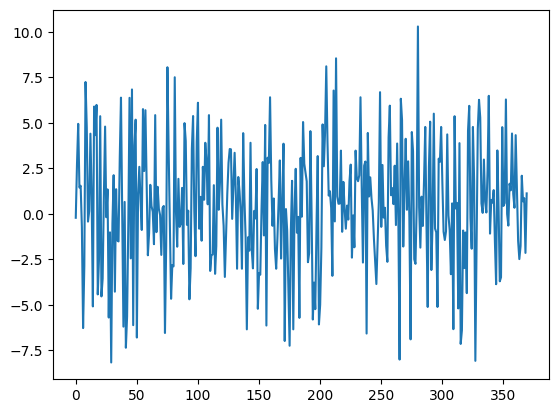

df_train.shape, df_test.shape :  (340, 1) (30, 1)


,0
0,-0.220001
1,2.720001
2,4.940002
3,1.440002
4,1.540009


In [24]:
np.set_printoptions(precision=2)
price_close = np.array(price_close[1:]).astype(np.float32)
# print(price_close)

# price_close = price_close[-100:]
price_ret = []
for i in range(1, len(price_close)):
  if abs(price_close[i] - price_close[i-1]) > 0.01:
    price_ret.append(price_close[i] - price_close[i-1])
price_ret = np.array(price_ret)
print('price_ret.shape : ', price_ret.shape)

plt.plot([i for i in range(len(price_ret))], price_ret)
plt.show()

# price_ret = price_ret[-100:]
N = len(price_ret) - 1
x = np.zeros(N)
y = np.zeros(N)
for i in range(1, N+1, 1):
  x[i-1] = i - 1
  y[i-1] = float(price_ret[i])

df_train = pd.DataFrame(price_ret[0:-30]).copy()
df_test = pd.DataFrame(price_ret[-30:]).copy()
print('df_train.shape, df_test.shape : ', df_train.shape, df_test.shape)
train_arima = df_train
test_arima = df_test
train_arima.head()

Step 1: Check for stationarity of time series
=========
Method #1: time series plot
---------------
Method #2: ACF plot and PACF plot
------------------------

In [22]:
history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Method #3: ADF test
---

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 1.3668767864552614e-26


Transform to stationary: differencing
------------

<Axes: >

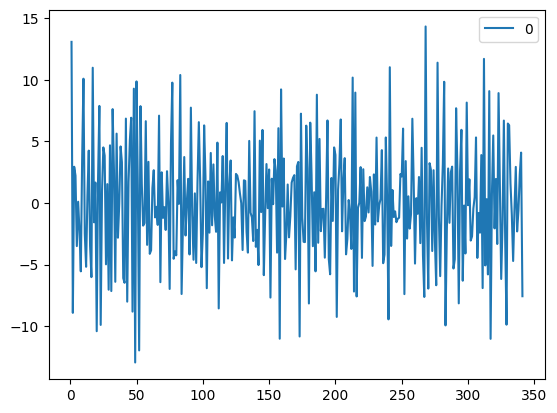

In [9]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

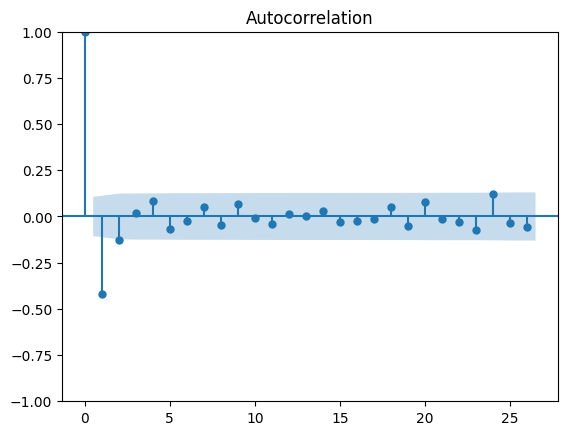

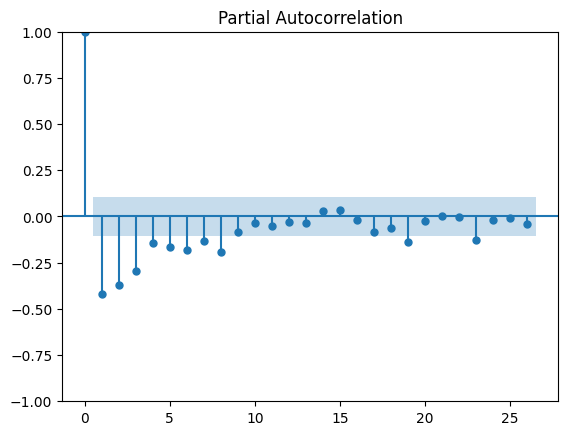

In [10]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [11]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 6.182391570533456e-21


Step 2: Determine ARIMA models parameters p, q
====
Step 3: Fit the ARIMA model
----

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  342
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -967.388
Date:                Sat, 06 Jul 2024   AIC                           1940.776
Time:                        13:30:39   BIC                           1952.272
Sample:                             0   HQIC                          1945.356
                                - 342                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5906      0.051    -11.519      0.000      -0.691      -0.490
ar.L2         -0.3786      0.052     -7.267      0.000      -0.481      -0.277
sigma2        17.0211      1.344     12.661      0.0

Step 4: Make time series predictions
==============

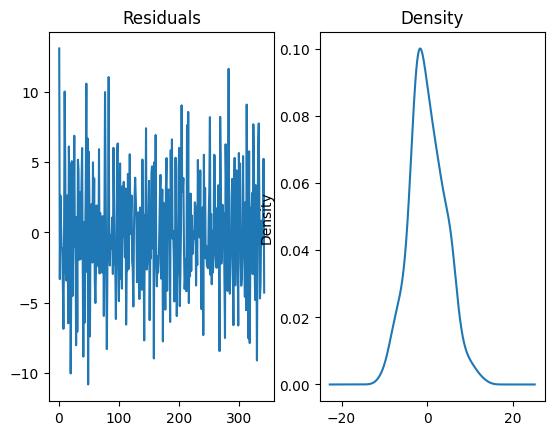

In [13]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

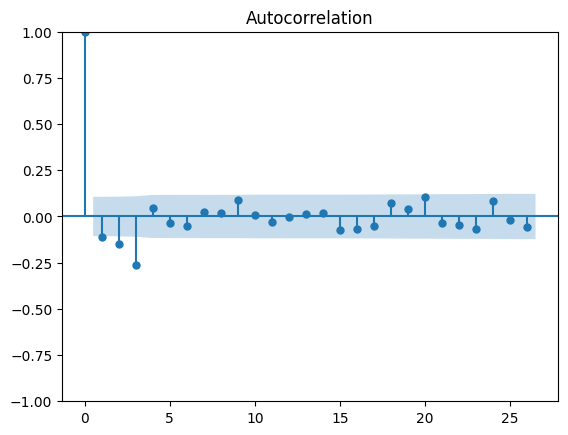

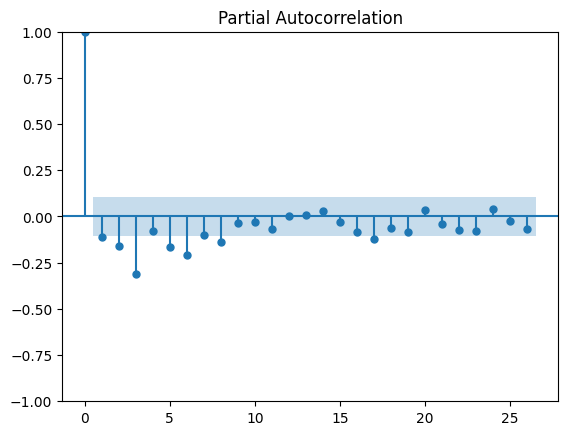

In [14]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

In [15]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

NameError: name 'df' is not defined

Optional: Auto-fit the ARIMA model
--

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ModuleNotFoundError: No module named 'pmdarima'